In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
df = pd.read_csv("/home/hadiii/python3/china_gdp.csv")
display(df.head(10))
display(df.describe())

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


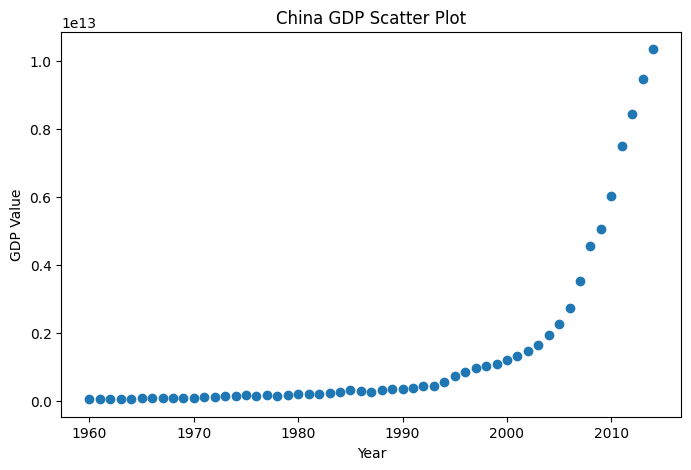

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(df["Year"], df["Value"])

plt.xlabel("Year")
plt.ylabel("GDP Value")
plt.title("China GDP Scatter Plot")
plt.show()

In [ ]:

x = df["Year"].values.astype(float)
y = df["Value"].values.astype(float)

y_min = y.min()
y_max = y.max()
y_scaled = (y - y_min) / (y_max - y_min)

def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

y_min = y.min()
y_max = y.max()
scale = y_max - y_min

y_scaled = (y - y_min) / scale

p0 = [1, 0.2, np.median(x)]

params, cov = curve_fit(logistic, x, y_scaled, p0=p0, maxfev=5000)
L_fit, k_fit, x0_fit = params

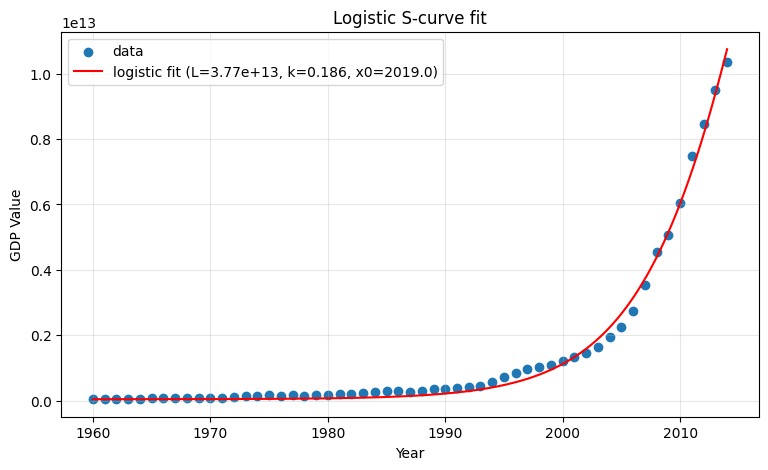

In [ ]:
x_fit = np.linspace(x.min(), x.max(), 300)
y_fit = logistic(x_fit, L_fit, k_fit, x0_fit) * scale + y_min

plt.figure(figsize=(9,5))
plt.scatter(x, y, label="data")
plt.plot(x_fit, y_fit,
         label=f"logistic fit (L={L_fit*scale:.2e}, k={k_fit:.3f}, x0={x0_fit:.1f})",
         color="red")

plt.xlabel("Year")
plt.ylabel("GDP Value")
plt.title("Logistic S-curve fit")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
y_pred = logistic(x, L_fit, k_fit, x0_fit) * scale + y_min

ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)

r2 = 1 - (ss_res / ss_tot)
print(f"R^2 = {r2:.4f}")

R^2 = 0.9948


In [33]:
year_input = 2020
predicted_value = logistic(year_input, L_fit, k_fit, x0_fit) * scale + y_min
print(f"Predicted GDP for year {year_input}: {predicted_value:.2f}")

Predicted GDP for year 2020: 20666543516054.25
